# **Multiple Linear Regression**



---

**Multi-Linear Regression** refers to the method used when there is more than one independent variable. Multi-Linear Regression can be written as below:


$$ \hat{y} = b + m_{1}X_{1} + m_{2}X_{2} + ... + m_{n}X_{n} $$


*where:*

*$\hat{y}:$ dependent variable (predicted value)*

*$ b :$ estimated intercept*

*$m_{i}X_{i}:$ estimated slope coefficient*

In this example we will try to use multi-linear regression to analyze the relationship of a product's price, advertisement cost, and the product sales number. We will also try to predict how much products will be sold given specific product's price and advertisement cost.

# Step 1: Data Preparation

In the cell code below, we will load some Python libraries we will be using, such as Pandas, NumPy, matplotlib, sklearn, etc. We will also load our dataset from GitHub into a dataframe called `df_pie` by using the Pandas library.

In [24]:
import pandas as pd
import numpy as np
import warnings

## Building Model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.compat import lzip

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [25]:
# Load dataset
df_pie = pd.read_csv('data.csv', index_col='week', sep=',')
print(df_pie.shape)
df_pie

(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


As seen above our dataset consist of 3 columns (pie_sales, price, and advertising) and 15 rows. We will try to predict how much pie will be sold depending on its price and advertisement cost.

# Step 2: Exploratory Data Analysis

Before going deeper into using multi-linear regression, it's always a good idea to simply visualize our data to understand it better and see if there are any relationship between each variable. To do this we will use the `pairplot()` function from the Seaborn library. The function will output a figure containing histogram and scatter plot between each variable.

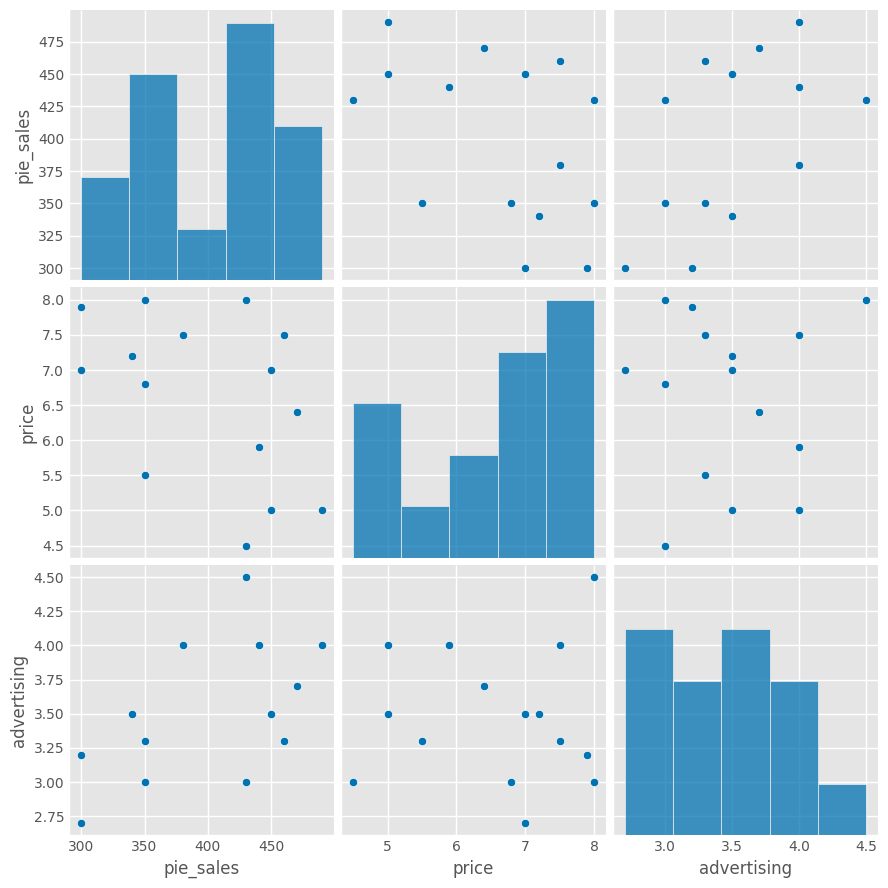

In [26]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

Looking at first row in the figures we can see that there might be relations between price, advertising, and pie_sales. The scatter plot between pie sales and price display pattern of negative relation, which means the higher the price the lower the sales will be. In the other hand the scatter plot between advertising and pie sales display a positive relation, the more money we spent on advertising the more pie we will sells.

### Multicollinearity

This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the `corr()` function from Pandas dataframe. Then we can display it as a heatmap using `heatmap()` function from Seaborn.

In [27]:
correlation = df_pie.corr()
print('Pearson correlation coefficient matrix of each variables:\n', correlation)

Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


<Axes: >

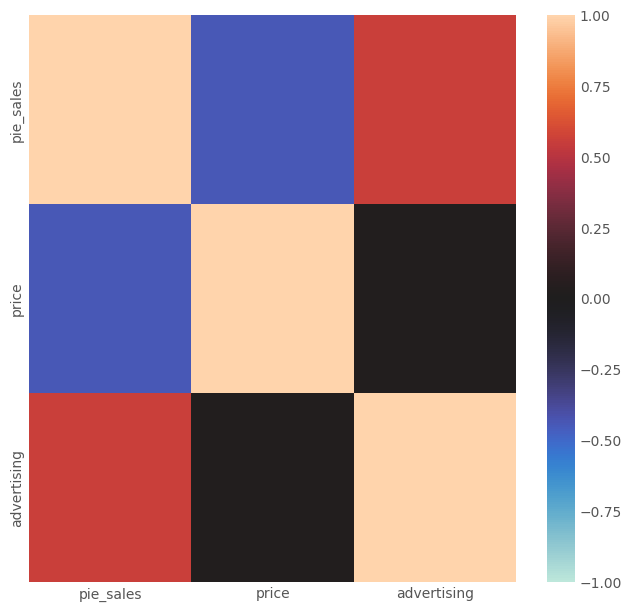

In [28]:
sns.heatmap(correlation, vmin=-1, vmax=1, center=0)

The image shows that there are some positive relationship between advertising and pie_sales and a negative relationship between price and pie_sales. Both of this result support our resulting model from before. Most importanly, notice how the price and advertising have almost 0 correlation coefficient. **This means both of our independent variable are not affecting each other and that there is no multicollinearity in our data.**

# Step 3: Building the Model

Since we already see that there might be relations between our independent and dependent variables, let's continue to building our regression model. We will use the `LinearRegression()` function from the sklearn library to build our models.

In [29]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

In [30]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

In [31]:
# Train the model
mlr_model.fit(X, y)

LinearRegression()

In [32]:
# Test the model using the same input data
y_pred = mlr_model.predict(X)

In [33]:
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


The code above printed few important values from our model. Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:

$\hat{y} = 306.5261 - 24.975X_{1} + 74.1309X_{2}$ 

Let's breakdown what each of those number means:

*   The intercept value is the estimated average value of our dependent variable when all of our independent variables values is 0. In our case this means that in the case we sell our pie at price of 0 and spent advertising expense of 0 we will sell about 306 pies.
*   For the coefficients we have 2 values for the price and advertising variables respectively. This value represents the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient. For example, if we increase our advertising expense by 10, we will also increase our sales by about 741 pies (74.1309 * 10).

# Step 3: Validate the Model

After building the model it is important for us to validate it's performance. We can evaluate a model by looking at it's coefficient of determination ($R^2$) and residuals. Before we continue we will rebuild our model using the statsmodel library with the `OLS()` function. Then we will print the model summary using the `summary()` function on the model. The model summary contains lots of important value we can use to evaluate our model.

In [34]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(df_pie['pie_sales'], X).fit()

In [35]:
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sun, 17 Sep 2023   Prob (F-statistic):             0.0120
Time:                        23:27:32   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

Residual is the difference between the observed value and predicted value from our dataset. With statsmodel we can easily get the residual value of our model by simply accesing the `.resid` attribute of the model and then we can keep it in a new column called 'residual' in our `df_pie` dataframe.

In [36]:
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


## Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:

$$ R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2} $$ 

In statsmodel we can obtain the $R^2$ value of our model by accesing the `.rsquared` attribute of the our model.

In [37]:
r2 = olsmod.rsquared
print('R2 score:', r2)

R2 score: 0.5214779360292288


In pandas, we can also obtain the $R^2$ value of our model by accesing the `.score` attribute of the our model.

In [38]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']

r2 = mlr_model.score(X, Y)
print("R2 score: ", r2)

R2 score:  0.5214779360292285


$R^2$ range between 0 and 1, where $R^2=0$ means there are no linear relationship between the variables and $R^2=1$ shows a perfect linear relationship. In our case, we got $R^2$ score about 0.5214 which means 52.14% of our dependent variable can be explained using our independent variables.

## F-test (ANOVA)

F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to $R^2$ score, we can easily get the F-statistic and probability of said F-statistic by accessing the `.fvalue` and `.f_pvalue` attribute of our model as below.

In [39]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 6.538606789020471
Probability of observing value at least as high as F-statistic: 0.012006372233186369


Because our f_pvalue is lower than 0.05 **we can conclude that our model performs better than other simpler model.**

# Step 4: Plot the Model

Before going into the next step we will try to visualize our model into 3D graph with the code cell below. We will draw the linear model as a blue plane and we will plot our data point in the graph as grey dot.

In [40]:
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

In [41]:
# Create range for each dimension
x = df_pie['price']
y = df_pie['advertising']
z = df_pie['pie_sales']

We can use the numpy `.linspace` method to generate test data with random values

In [42]:
x_test = np.linspace(4, 9, 30)  # range of price values
y_test = np.linspace(2, 5, 30)  # range of advertising values

In [43]:
x_test, y_test = np.meshgrid(x_test, y_test)
model_viz = np.array([x_test.flatten(), y_test.flatten()]).T

In [44]:
predicted = mlr_model.predict(model_viz)

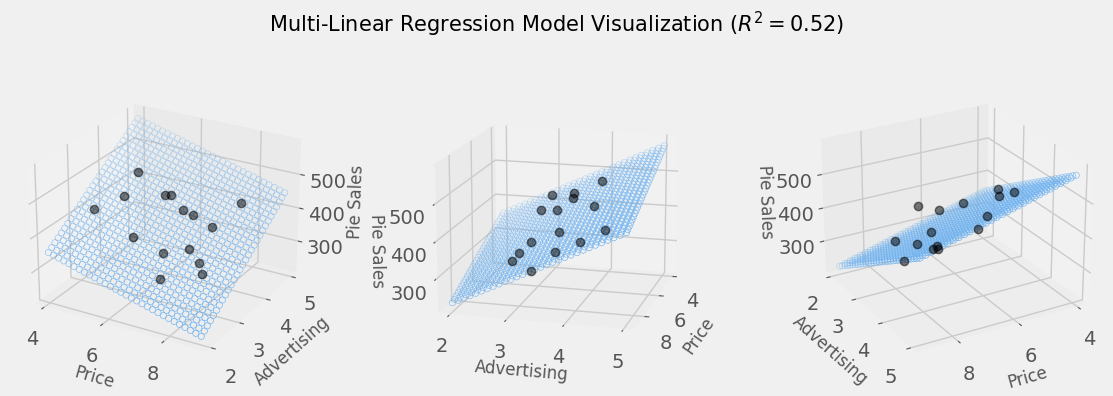

In [45]:
# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_test.flatten(), y_test.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

Here is the full 360° view of the model visualization:

<div align="center">
<img src="https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif" height='300'><br>
<a href='https://github.com/rafiag/DTI2020/blob/main/images/Multi-Linear%20Regression%20Model%20Visualization.gif'>Click here if the image failed to load.</a>
<div>

# Step 5: Test the model

Now, let's try to predict our pie sales by inputing our own data below...

In [46]:
# Values to predict
price = input('What is the price of the pie? \n')
advertising = input('How much money are you going to spend for advertising? \n')

try:
    print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
        mlr_model.predict([[float(price), float(advertising)]])[0],
        price,
        advertising))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

Please only input either:
- whole number e.g. 1, 4, 7
- decimal/float number e.g. 3.8


# Conclusion

Our models succesfuly passed all the tests in the model validation steps, so we can conclude that our model can perform well to predict future pie sales by using the two independent variables, price and advertising. But still, our model only has $R^2$ score of 52.14%, which means that there is still about 48% unknown factors that are affecting our pie sales.